In [2]:
import numpy as np
import sys
import os
absolute_path = os.path.abspath("..")
absolute_path=absolute_path.replace(os.sep, '/')
sys.path.append(absolute_path)
folder_name=os.path.basename(os.path.abspath("."))
import pylab 
import matplotlib.pyplot as plt
from matplotlib.axis import Axis  
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from IPython import display 
import datetime
import timeit
import random
import time
from matplotlib import gridspec

In [4]:
print(absolute_path)

/Users/panagiotispapanastasiou/REPOS/Theoretical_Leakage


In [6]:
#-----------------------------------------------------------------------------
# Function to extract the result from each file
def extract_result_from_file(file_path,parameter):
    with open(file_path, 'r') as file:
        for line in file:
            if parameter in line:
                result = float(line.split(parameter)[1].strip())
                return result               
    return None

In [8]:
subfolder_path ="script_p=6_HomRR_data" #os.path.join(log_folder, subfolder_name)
Rates =[]
dbs=[]
betas=[]
nvals=[]
Vs=[]
leaks=[]
snrs=[]
Rsynds=[]
Memsps=[]
for file_name in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, file_name)
        # Ensure it's a file before reading it
        if os.path.isfile(file_path):
            Rate = extract_result_from_file(file_path,"Rate")
            db=extract_result_from_file(file_path,"db")
            beta=extract_result_from_file(file_path,"beta_out")
            nval=extract_result_from_file(file_path,"nval")
            V=extract_result_from_file(file_path,"V ")
            leak=extract_result_from_file(file_path,"leakage")
            snr=extract_result_from_file(file_path,"SNR")
            Rsynd= extract_result_from_file(file_path,"Rsynd")
            Memsp=extract_result_from_file(file_path,"Mem_sp")
            if Rate is not None:
                  Rates.append(Rate)
            if db is not None:
                       dbs.append(db)                 
            if beta is not None:
                         betas.append(beta)
            if nval is not None:
                          nvals.append(nval)
            if V is not None:
                         Vs.append(V)
            if leak is not None:
                         leaks.append(leak)
            if snr is not None:
                snrs.append(snr)
            if Memsp is not None:
                         Memsps.append(Memsp)
            if Rsynd is not None:
                          Rsynds.append(Rsynd)
        #Convert the list to a NumPy array
        Rate_array = np.array(Rates)
        db_array=np.array(dbs)
        beta_array=np.array(betas)
        nval_array=np.array(nvals)
        V_array=np.array(Vs)
        leak_array=np.array(leaks)
        snr_array=np.array(snrs)
        Rsynd_array=np.array(Rsynds)
        Memsp_array=np.array(Memsps)
        # #Get the indices that would sort the transmissivity array
        sorted_indices_db = np.argsort(db_array)
        # # Use the sorted indices to sort both arrays
        db_sorted = db_array[sorted_indices_db]
        Rate_sorted=Rate_array[sorted_indices_db]
        beta_sorted=beta_array[sorted_indices_db]  
        nval_sorted=nval_array[sorted_indices_db]
        V_sorted=V_array[sorted_indices_db]
        leak_sorted=leak_array[sorted_indices_db]
        snr_sorted=snr_array[sorted_indices_db]
        Rsynd_sorted=Rsynd_array[sorted_indices_db]  
        Memsp_sorted=Memsp_array[sorted_indices_db]
# #----------------------------------------------------------------    
start_date = datetime.datetime.now()
start_timer = timeit.default_timer()  

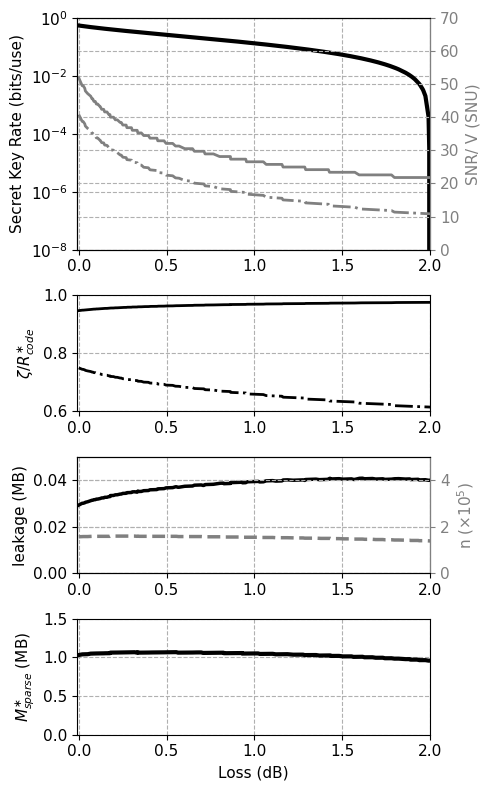

In [17]:
fig = plt.figure(figsize=(5, 8))
gs = gridspec.GridSpec(4, 1, width_ratios=[1], height_ratios=[2,1, 1,1])
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ax1=plt.subplot(gs[0])
ax1.plot(db_sorted, Rate_sorted, linestyle='-',lw=3,color='black')
ax1.set_ylim([10**(-8),10*10**(-1)])
ax1.set_xlim([-0.01,2])
ax1.set_yscale('log')
ax1.set_ylabel('Secret Key Rate (bits/use)',fontsize=11)
ax1.grid(True, which="both", ls="--")
ax1.tick_params(axis='both', labelsize=11)  # Changes font size for both x and y axes
#-----------------------------------------------------------------
ax2=ax1.twinx()
ax2.plot(db_sorted,V_sorted,color='grey',lw=2)
ax2.plot(db_sorted,snr_sorted,color='grey',ls="-.",lw=2)
ax2.set_ylim([0, 70])
ax2.set_ylabel('SNR/ V (SNU)', color='grey',fontsize=11)
ax2.spines['right'].set_color('grey')  # Left spine (y-axis) color
ax2.tick_params(axis='both', labelsize=11)  # Changes font size for both x and y axes
ax2.tick_params(axis='y', colors='grey')  # Y-axis tick labels color
ax2.grid(True, which="both", ls="--")
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ax3=plt.subplot(gs[1])
ax3.plot( db_sorted,beta_sorted, linestyle='-',lw=2,color='black')
ax3.plot( db_sorted,1-Rsynd_sorted,color='black',ls="-.",lw=2)
ax3.set_ylim([0.6, 1])
ax3.set_xlim([-0.01,2])
ax3.set_ylabel(r'$\zeta$/$R^{\ast}_{code}$', color='black',fontsize=11)
ax3.grid(True, which="both", ls="--")
ax3.tick_params(axis='both', labelsize=11)  # Changes font size for both x and y axes
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ax5=plt.subplot(gs[2])
ax5.plot( db_sorted,leak_sorted,color='blacK',lw=2.5)
ax5.set_ylim([0,0.05])
ax5.set_xlim([-0.01,2])
ax5.set_ylabel('leakage (MB)',fontsize=11)
ax5.grid(True, which="both", ls="--")
ax5.tick_params(axis='both', labelsize=11)  # Changes font size for both x and y axes
#-----------------------------------------------------------------
ax6=ax5.twinx()
ax6.plot( db_sorted,nval_sorted/10**5,color='grey',ls="--",lw=2.5)
ax6.set_ylim([0, 5])
ax6.set_ylabel(r'n ($\times 10^5$)', color='grey',fontsize=11)
ax6.spines['right'].set_color('grey')  # Left spine (y-axis) color
ax6.tick_params(axis='both', labelsize=11)  # Changes font size for both x and y axes
ax6.tick_params(axis='y', colors='grey')  # Y-axis tick labels color
ax6.grid(True, which="both", ls="--")
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
ax7=plt.subplot(gs[3])
ax7.plot( db_sorted,Memsp_sorted,color='black',lw=3)
ax7.set_ylim([0, 1.5])
ax7.set_xlim([-0.01,2])
ax7.set_ylabel(r'$M^{\ast}_{sparse}$ (MB)',fontsize=11)
ax7.grid(True, which="both", ls="--")
ax7.tick_params(axis='both', labelsize=11)  # Changes font size for both x and y axes
ax7.set_xlabel('Loss (dB)',fontsize=11)
# #-----------------------------------------------------------------
# ax8=ax7.twinx()
# ax8.plot( N_sorted,nval_sorted/10**6,color='grey',lw=3.5)
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
plt.tight_layout()
figure_name_eps = str(subfolder_path)+'.eps'  # Replace with your desired file name
figure_name_png =  str(subfolder_path) +'.png'  # Replace with your desired file name
plt.savefig(figure_name_eps, format='eps')
plt.savefig(figure_name_png, format='png')